In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## Public Water System Contamination Prediction
Team 125:
Anzar Chowdhury,
Ethan Kurtz,
Brandon Gunsati

Data source: https://www.epa.gov/dwucmr/occurrence-data-unregulated-contaminant-monitoring-rule#5

Link for dataset download (contains data dictionary/summary as well):
https://www.epa.gov/system/files/other-files/2023-08/ucmr5-occurrence-data-by-state.zip

Title of dataset: UCMR5_All_Tribes_AK_LA.txt


In [2]:
file_path = 'UCMR5_All_Tribes_AK_LA.txt'
contamination_df = pd.read_csv(file_path, delimiter='\t', encoding='ISO-8859-1') 


In [3]:
contamination_df.head()

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,MRL,Units,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State,UCMR1SampleType
0,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.005,µg/L,EPA 537.1,<,NaN,SE1,AM,1,01,NaN
1,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.004,µg/L,EPA 533,<,NaN,SE1,AM,1,01,NaN
2,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.005,µg/L,EPA 533,<,NaN,SE1,AM,1,01,NaN
3,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.003,µg/L,EPA 533,=,0.0182,SE1,AM,1,01,NaN
4,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,NaN,...,0.002,µg/L,EPA 533,<,NaN,SE1,AM,1,01,NaN


In [4]:
contamination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212364 entries, 0 to 212363
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PWSID                    212364 non-null  object 
 1   PWSName                  212364 non-null  object 
 2   Size                     212364 non-null  object 
 3   FacilityID               212364 non-null  object 
 4   FacilityName             212364 non-null  object 
 5   FacilityWaterType        212364 non-null  object 
 6   SamplePointID            212364 non-null  object 
 7   SamplePointName          212364 non-null  object 
 8   SamplePointType          212364 non-null  object 
 9   AssociatedFacilityID     0 non-null       float64
 10  AssociatedSamplePointID  0 non-null       float64
 11  CollectionDate           212364 non-null  object 
 12  SampleID                 212364 non-null  object 
 13  Contaminant              212364 non-null  object 
 14  MRL 

In [5]:
# dropping AssociatedFacilityID, AssociatedSamplePointID and UCMR1SampleType as they only contain null vales and 
# are not relevant to the project as well as the dataset according the the data dictionary 
columns_to_drop = ['AssociatedFacilityID', 'AssociatedSamplePointID', 'UCMR1SampleType']
contamination_df = contamination_df.drop(['AssociatedFacilityID', 'AssociatedSamplePointID', 'UCMR1SampleType'], 
                                         axis = 1)



In [6]:
contamination_df.isna().sum()

PWSID                         0
PWSName                       0
Size                          0
FacilityID                    0
FacilityName                  0
FacilityWaterType             0
SamplePointID                 0
SamplePointName               0
SamplePointType               0
CollectionDate                0
SampleID                      0
Contaminant                   0
MRL                           0
Units                         0
MethodID                      0
AnalyticalResultsSign         0
AnalyticalResultValue    206630
SampleEventCode               0
MonitoringRequirement         0
Region                        0
State                         0
dtype: int64

In [7]:
contamination_df.dtypes

PWSID                     object
PWSName                   object
Size                      object
FacilityID                object
FacilityName              object
FacilityWaterType         object
SamplePointID             object
SamplePointName           object
SamplePointType           object
CollectionDate            object
SampleID                  object
Contaminant               object
MRL                      float64
Units                     object
MethodID                  object
AnalyticalResultsSign     object
AnalyticalResultValue    float64
SampleEventCode           object
MonitoringRequirement     object
Region                     int64
State                     object
dtype: object

In [8]:
contamination_df['CollectionDate'] = pd.to_datetime(contamination_df['CollectionDate'])

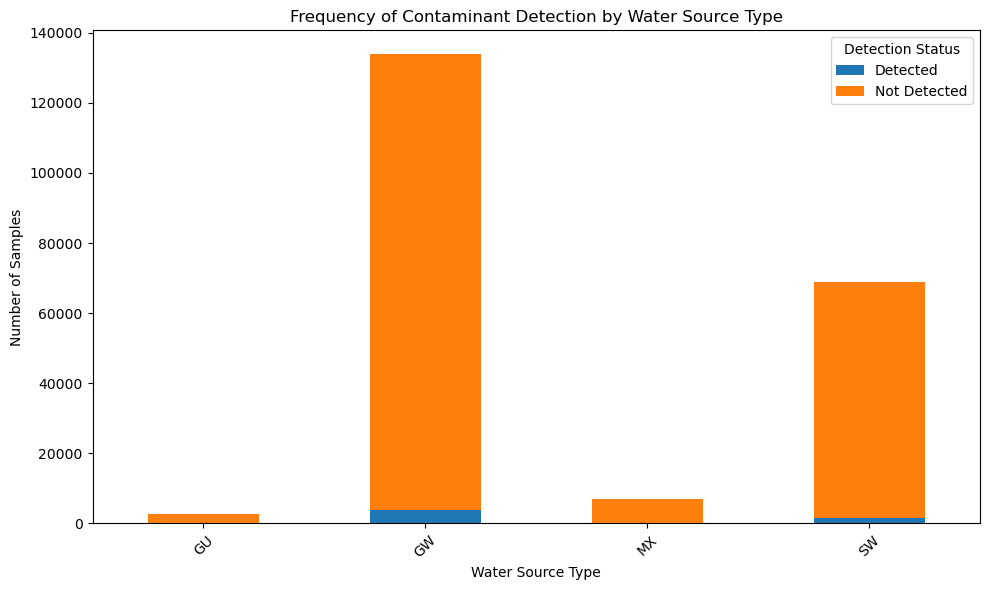

In [9]:
#creating a new column which states whether the contaminant was detected, that is if the water sample had a 
# contamination level above the MRL or Minimum Reporting Level
contamination_df['Detection'] = (
    contamination_df['AnalyticalResultsSign'].apply(lambda x: 'Detected' if x == '=' else 'Not Detected')
)

# grouping by FacilityWaterType and Detection, then counting samples
detection_counts = contamination_df.groupby(['FacilityWaterType', 'Detection']).size().unstack(fill_value=0)


detection_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frequency of Contaminant Detection by Water Source Type')
plt.xlabel('Water Source Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Detection Status')

plt.tight_layout()
plt.show()

Groundwater (GW):  Groundwater sources have the most samples and show low occurrences of contaminant detection, suggesting overall good water quality or effective containment of contaminants. This could imply natural protection from soil and rock layers

Surface Water (SW): The SW bar is significant in height, second to GW, with a considerable number of samples showing detected contaminants. This suggests that surface water sources have a higher occurrence of contaminant detection than groundwater or mixed sources. This could point to surface water being more vulnerable to contamination or reflect a higher number of potential pollution sources, such as run-off or industrial discharge.

Groundwater under the direct influence of surface water (GU) and MX (Any combination of SW, GW and GU) have the least samples and virtually no detections as suggested by the graph. Groundwater under surface water does not seem to be as effected by surface water.



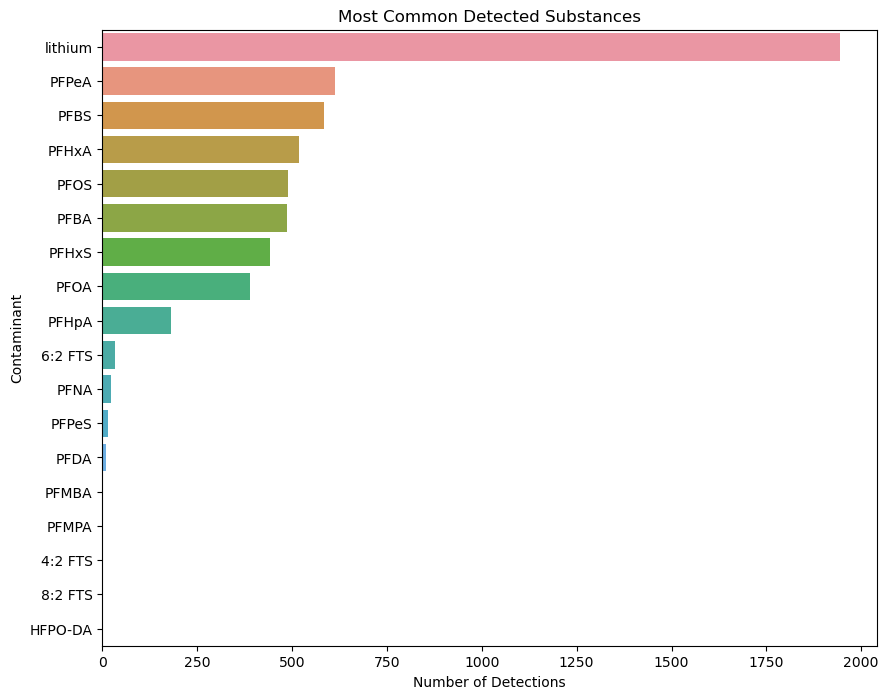

In [10]:
# filtering the dataset to only include cases where a contaminant is detected, ie, above the MRL
detected_df = contamination_df[contamination_df['Detection'] == 'Detected']

# counting the occurrences of each detected contaminant
contaminant_counts = detected_df['Contaminant'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=contaminant_counts.values, y=contaminant_counts.index)
plt.xlabel('Number of Detections')
plt.ylabel('Contaminant')
plt.title('Most Common Detected Substances')

# Display the plot
plt.show()

According to the graph above, Lithium is by far the most common contaminant. It is followed by a variety of Per- and polyfluoroalkyl substancesors (PFAS) with PFPeA, PFBS and PFHxA being the three most common ones. However, it is important to note that we are looking for the presence of contaminants, not if the contaminants present are at levels that could cause health issues. 

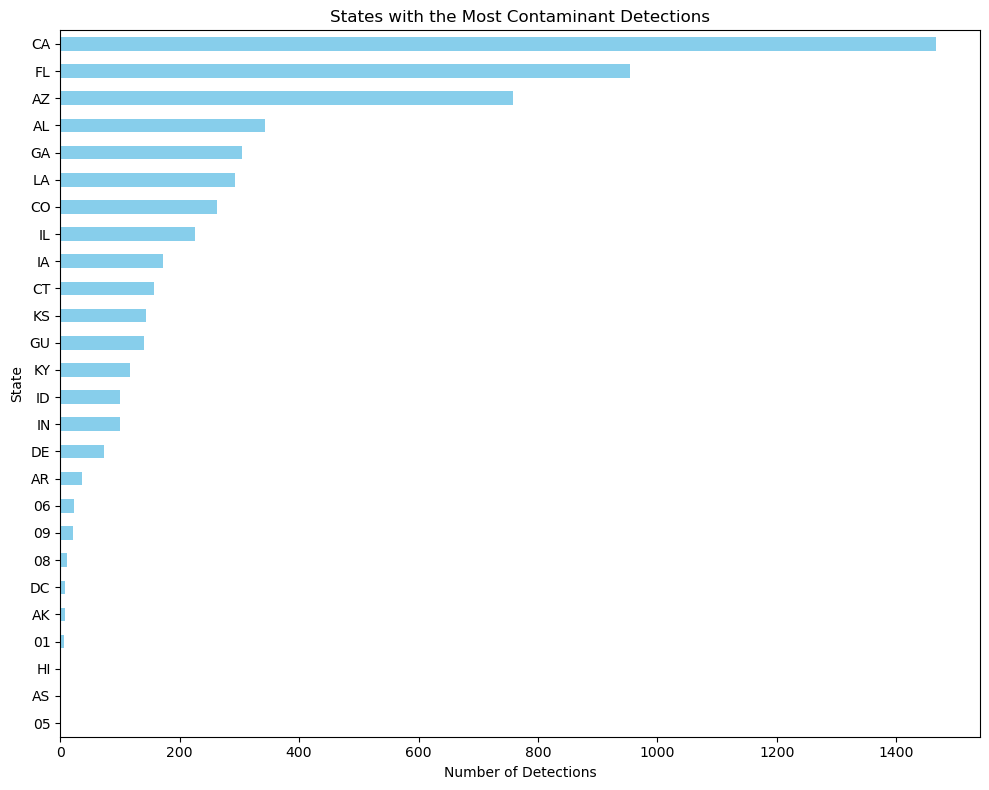

In [11]:
# Count the number of detections in each state
state_counts = detected_df['State'].value_counts()

# Create a horizontal bar plot for the states
plt.figure(figsize=(10, 8))
state_counts.plot(kind='barh', color='skyblue')

# Add labels and title
plt.xlabel('Number of Detections')
plt.ylabel('State')
plt.title('States with the Most Contaminant Detections')

# Invert y-axis to have the state with the highest count at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

From the above graph we can see that Arizona has the highest number of detections, followed by Arizona and Alaska. 

Note: the numbers refer to Tribal PWSs which are tied to an EPA region (refer to data dictionary)

In [12]:
unique_contaminants = contamination_df['Contaminant'].unique()

In [13]:
# checking to see if all contaminants are tested for at the same time 
# grouping by CollectionDate and PWSID, and aggregate the unique contaminants in each group
grouped = contamination_df.groupby(['CollectionDate', 'PWSID'])['Contaminant'].agg(lambda x: set(x.unique()))

# checking to see if all contaminants are tested in each group
all_tested_simultaneously = grouped.apply(lambda x: set(unique_contaminants).issubset(x))

# if every group has True, then all contaminants are tested simultaneously for each date and PWSID
all_contaminants_tested_simultaneously = all_tested_simultaneously.all()
all_contaminants_tested_simultaneously

False

To fulfil our aim to develop a model that can predict whether a water sample from a particular public water system (PWS) will contain a specific contaminant at levels above the minimum reporting level (MRL), we will use LogisticRegression for classification. Given that we want to find whether a specific contaminant will be detected, we will have to run the model for every unique contaminant. Additionally, given that we will predict a binary outcome, that is, whether a specific contaminent is detected or not LogisticRegression is an appropriate algorithm to use. Additionally, logistic regression not only classifies outcomes but also provides probabilities for the predictions. This is particularly useful in risk assessment and decision-making processes where understanding the likelihood of contamination is essential. Logistic Regression also offer straightforward easily interpretable results which are valuable for stakeholders who need to understand the factors influencing water quality

In [14]:
# creating a binary column for each unique contaminant that will have a 1 if that specific contaminant was detected
for contaminant in unique_contaminants:
    # creating a new column for each contaminant
    contamination_df[f'Detected_{contaminant}'] = contamination_df.apply(
        lambda x: 1 if (x['Contaminant'] == contaminant and x['Detection'] == 'Detected') else 0, axis=1)
    
# this makes our previous Detection column redundant, hence we will drop it 
contamination_df.drop(['Detection'], axis = 1)

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,CollectionDate,...,Detected_PFMBA,Detected_9Cl-PF3ONS,Detected_PFBA,Detected_PFHxS,Detected_PFTA,Detected_NFDHA,Detected_PFHpS,Detected_PFHpA,Detected_PFOS,Detected_NMeFOSAA
0,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-08-09,...,0,0,0,0,0,0,0,0,0,0
1,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-09-27,...,0,0,0,0,0,0,0,0,0,0
2,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-09-27,...,0,0,0,0,0,0,0,0,0,0
3,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-09-27,...,0,0,0,0,0,0,0,0,0,0
4,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-09-27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212359,LA2033025,DELTECH CORPORATION,S,10001,Well #1 Chlorinator,GW,EP1,Sample Tap @ Well #1 chlorinator,EP,2023-07-11,...,0,0,0,0,0,0,0,0,0,0
212360,LA2033025,DELTECH CORPORATION,S,10001,Well #1 Chlorinator,GW,EP1,Sample Tap @ Well #1 chlorinator,EP,2023-07-11,...,0,0,0,0,0,0,0,0,0,0
212361,LA2033025,DELTECH CORPORATION,S,10001,Well #1 Chlorinator,GW,EP1,Sample Tap @ Well #1 chlorinator,EP,2023-07-11,...,0,0,0,0,0,0,0,0,0,0
212362,LA2033025,DELTECH CORPORATION,S,10001,Well #1 Chlorinator,GW,EP1,Sample Tap @ Well #1 chlorinator,EP,2023-07-11,...,0,0,0,0,0,0,0,0,0,0


In [15]:
contamination_df.shape

(212364, 52)

In [16]:
# checking too see which contaminants are detected less than a 100 times. These instances will be dropped given 
# to ensure our model runs smoothly, so that it is trained and tested on data with sufficient detections. 
# By doing so, we are looking at relatively more common contaminats, and given the size of our dataset, the
# best option going forward is to drop those with less than 100 detections
detected_counts = {col: contamination_df[col].sum() for col in contamination_df.columns if 
                   col.startswith('Detected_')}
detected_counts_series = pd.Series(detected_counts)
print(f"Contaminants with Counts: {detected_counts_series}" + "\n")

# Step 2: Identify contaminants with less than 100 detections
contaminants_few_detections = detected_counts_series[detected_counts_series < 100].index
print("Contaminants with less than 100 detections:" + "\n", contaminants_few_detections.tolist())


Contaminants with Counts: Detected_NEtFOSAA           0
Detected_PFNA              22
Detected_8:2 FTS            1
Detected_PFPeA            613
Detected_PFUnA              0
Detected_4:2 FTS            1
Detected_6:2 FTS           34
Detected_PFMPA              2
Detected_PFPeS             15
Detected_PFDoA              0
Detected_PFHxA            519
Detected_PFDA               9
Detected_PFOA             388
Detected_PFEESA             0
Detected_11Cl-PF3OUdS       0
Detected_HFPO-DA            1
Detected_PFTrDA             0
Detected_lithium         1945
Detected_PFBS             583
Detected_ADONA              0
Detected_PFMBA              2
Detected_9Cl-PF3ONS         0
Detected_PFBA             486
Detected_PFHxS            442
Detected_PFTA               0
Detected_NFDHA              0
Detected_PFHpS              0
Detected_PFHpA            182
Detected_PFOS             489
Detected_NMeFOSAA           0
dtype: int64

Contaminants with less than 100 detections:
 ['Detected_NEtF

In [17]:
columns_to_drop = [contaminant for contaminant in contaminants_few_detections]
contamination_df.drop(columns_to_drop, axis=1)

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,CollectionDate,...,Detection,Detected_PFPeA,Detected_PFHxA,Detected_PFOA,Detected_lithium,Detected_PFBS,Detected_PFBA,Detected_PFHxS,Detected_PFHpA,Detected_PFOS
0,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-08-09,...,Not Detected,0,0,0,0,0,0,0,0,0
1,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-09-27,...,Not Detected,0,0,0,0,0,0,0,0,0
2,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-09-27,...,Not Detected,0,0,0,0,0,0,0,0,0
3,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-09-27,...,Detected,1,0,0,0,0,0,0,0,0
4,010106001,Mashantucket Pequot Water System,L,00006,MPTN WTP,GU,TP1,Entry point to Dist. System,EP,2023-09-27,...,Not Detected,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212359,LA2033025,DELTECH CORPORATION,S,10001,Well #1 Chlorinator,GW,EP1,Sample Tap @ Well #1 chlorinator,EP,2023-07-11,...,Not Detected,0,0,0,0,0,0,0,0,0
212360,LA2033025,DELTECH CORPORATION,S,10001,Well #1 Chlorinator,GW,EP1,Sample Tap @ Well #1 chlorinator,EP,2023-07-11,...,Not Detected,0,0,0,0,0,0,0,0,0
212361,LA2033025,DELTECH CORPORATION,S,10001,Well #1 Chlorinator,GW,EP1,Sample Tap @ Well #1 chlorinator,EP,2023-07-11,...,Not Detected,0,0,0,0,0,0,0,0,0
212362,LA2033025,DELTECH CORPORATION,S,10001,Well #1 Chlorinator,GW,EP1,Sample Tap @ Well #1 chlorinator,EP,2023-07-11,...,Not Detected,0,0,0,0,0,0,0,0,0


In [18]:
# we have already dropped the required columns, we still need to filter rows for contaminants
# with very insignificant or no detections (ie < 100 detections)
contaminant_names_few_detected = [name.split('Detected_')[1] for name in contaminants_few_detections]

print(f"Original dataframe shape: {contamination_df.shape}")

# filter the dataframe to exclude rows where the 'Contaminant' is in the extracted list
contamination_df = contamination_df[~contamination_df['Contaminant'].isin(contaminant_names_few_detected)]


print(f"Filtered dataframe shape: {contamination_df.shape}")

Original dataframe shape: (212364, 52)
Filtered dataframe shape: (63713, 52)


In [19]:
# additionally create a column for Collection month given to account for potential seasonal effects
contamination_df['CollectionMonth'] = contamination_df['CollectionDate'].dt.month

Training model for: PFPeA
              precision    recall  f1-score   support

           0       0.99      0.72      0.84     18930
           1       0.02      0.56      0.04       184

    accuracy                           0.72     19114
   macro avg       0.51      0.64      0.44     19114
weighted avg       0.98      0.72      0.83     19114



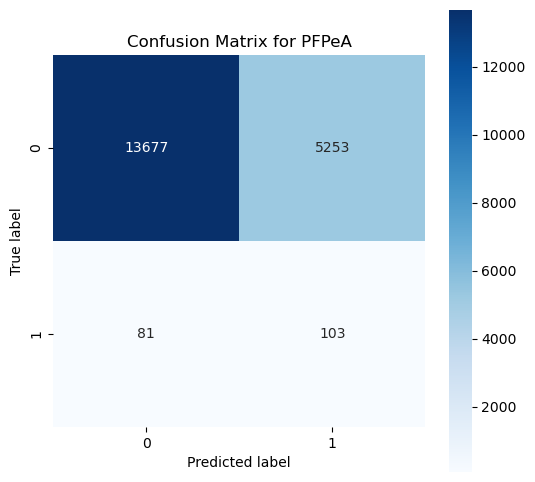

Training model for: PFHxA
              precision    recall  f1-score   support

           0       1.00      0.69      0.81     18958
           1       0.02      0.63      0.03       156

    accuracy                           0.69     19114
   macro avg       0.51      0.66      0.42     19114
weighted avg       0.99      0.69      0.81     19114



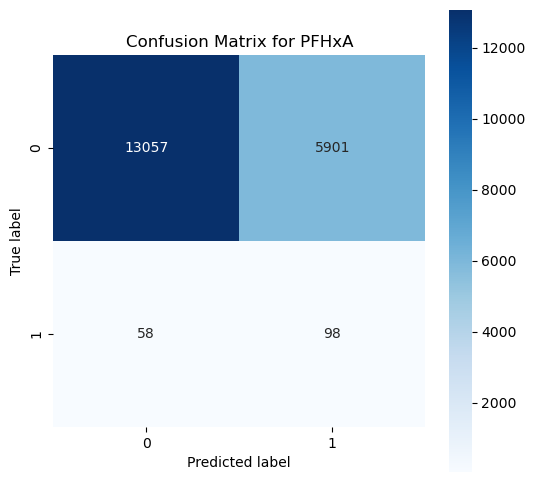

Training model for: PFOA
              precision    recall  f1-score   support

           0       1.00      0.62      0.77     18998
           1       0.01      0.68      0.02       116

    accuracy                           0.62     19114
   macro avg       0.50      0.65      0.39     19114
weighted avg       0.99      0.62      0.76     19114



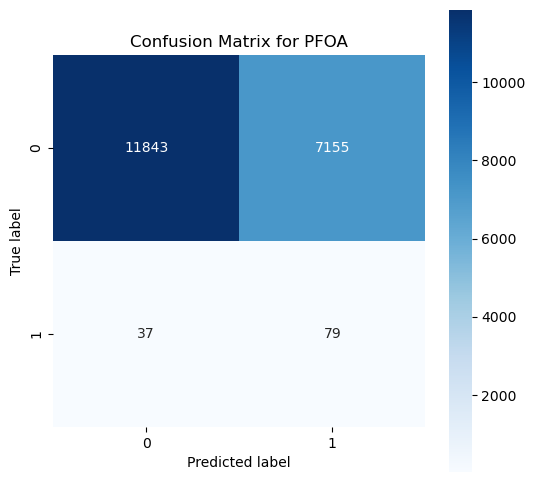

Training model for: lithium
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     18530
           1       0.05      0.70      0.10       584

    accuracy                           0.62     19114
   macro avg       0.52      0.66      0.43     19114
weighted avg       0.96      0.62      0.74     19114



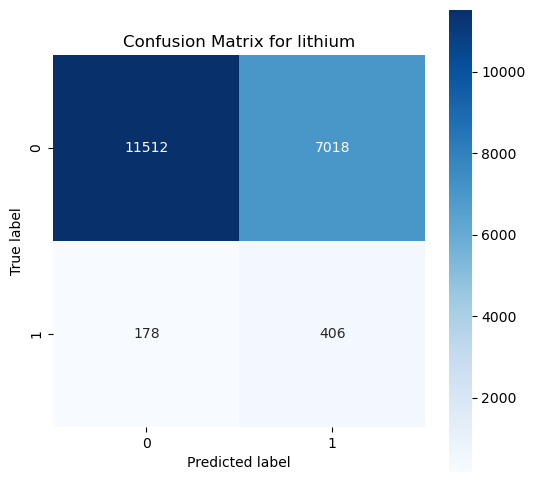

Training model for: PFBS
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     18939
           1       0.02      0.67      0.04       175

    accuracy                           0.71     19114
   macro avg       0.51      0.69      0.44     19114
weighted avg       0.99      0.71      0.82     19114



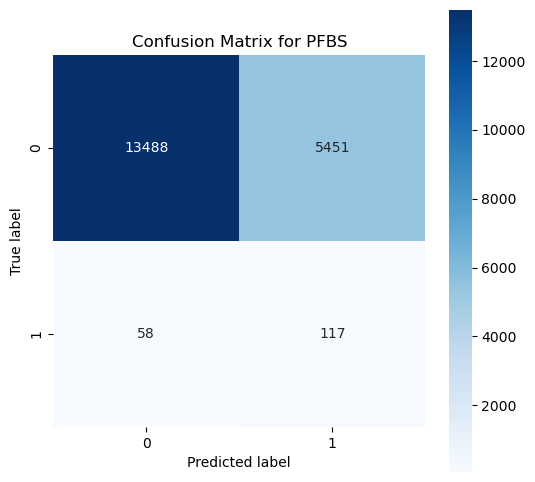

Training model for: PFBA
              precision    recall  f1-score   support

           0       1.00      0.61      0.76     18968
           1       0.02      0.77      0.03       146

    accuracy                           0.62     19114
   macro avg       0.51      0.69      0.40     19114
weighted avg       0.99      0.62      0.76     19114



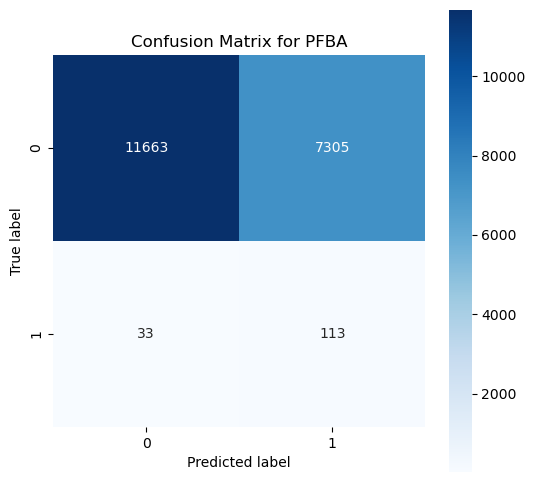

Training model for: PFHxS
              precision    recall  f1-score   support

           0       1.00      0.58      0.73     18981
           1       0.01      0.82      0.03       133

    accuracy                           0.58     19114
   macro avg       0.51      0.70      0.38     19114
weighted avg       0.99      0.58      0.73     19114



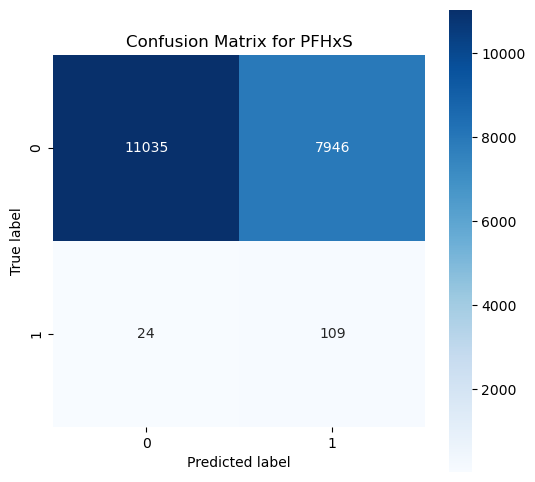

Training model for: PFHpA
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     19059
           1       0.01      0.67      0.02        55

    accuracy                           0.77     19114
   macro avg       0.50      0.72      0.44     19114
weighted avg       1.00      0.77      0.86     19114



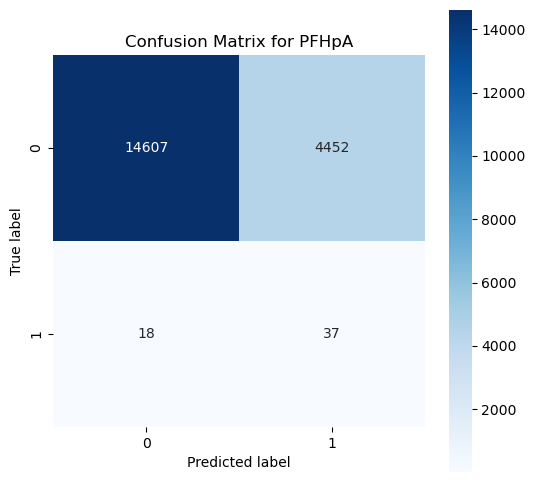

Training model for: PFOS
              precision    recall  f1-score   support

           0       1.00      0.66      0.79     18967
           1       0.02      0.72      0.03       147

    accuracy                           0.66     19114
   macro avg       0.51      0.69      0.41     19114
weighted avg       0.99      0.66      0.79     19114



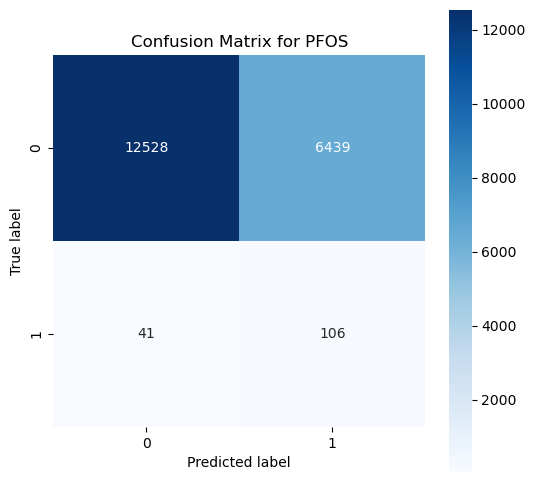

In [20]:
def train_logistic_regression(X, y):
    """
    Train a logistic regression model and print the accuracy.
    
    Parameters:
    - X: features dataframe
    - y: target series
    
    Returns:
    - trained logistic regression model
    """
    # encoding categorical features
    categorical_features = ['FacilityWaterType', 'Region', 'State', 'SamplePointType', 'CollectionMonth']
    X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True, dtype=int)
    
    # splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)
    
    # initializing and training the logistic regression model
    # increasing max_iter to prevent convergance issues
    # balancing class_weight given that there are significantly more cases in which a contaminant is not detected
    model = LogisticRegression(max_iter=15000, class_weight = 'balanced')
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculating and printing the classification report
    print(classification_report(y_test, y_pred, zero_division=0))
    
    
     # Calculating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualizing the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
    plt.title(f'Confusion Matrix for {contaminant}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    
    return model

# dictionary to store the models for each contaminant 
contaminant_models = {}

# features
feature_columns = ['FacilityWaterType', 'Region', 'State', 'SamplePointType', 'CollectionMonth'] 
X = contamination_df[feature_columns]

unique_contaminants_new = contamination_df['Contaminant'].unique()


for contaminant in unique_contaminants_new:
    y = contamination_df[f'Detected_{contaminant}']
    # double checking that cases where the contaminant are never detected are dropped 
    if len(y.unique()) < 2:
        print(f"Skipping model for {contaminant} due to single class in target variable." + "\n")
    else:
        print(f"Training model for: {contaminant}")
    # training the model and storing it in the dictionary
        contaminant_models[contaminant] = train_logistic_regression(X, y)

Imbalanced Classes: The support values indicate a significant class imbalance for all contaminants, with the majority class (0, or not detected) having much larger sample sizes compared to the minority class (1, or detected).

Precision and Recall:

For the majority class (0), precision is consistently high across all models, indicating that when the model predicts a sample does not contain the contaminant, it is usually correct.
For the minority class (1), precision is very low, showing that there are many false positives — instances where the model incorrectly predicts the presence of the contaminant.
Recall varies across the models for both classes. For the majority class, it ranges from around 0.58 to 0.77, suggesting that the model misses some true negatives. For the minority class, the recall is higher, suggesting the model is better at identifying most of the true positives, but this is likely at the cost of incorrectly classifying many negatives as positives (low precision).

F1-Score:

The F1-score is relatively high for the majority class due to the high precision and moderate recall.
For the minority class, the F1-score is very low across all contaminants. This indicates a poor balance between precision and recall — the model struggles to predict the presence of contaminants accurately.

Accuracy:

The overall accuracy ranges from 0.62-0.77. Meaning that 0.62-0.77% of the the predicitons were accurately guessed by the model for their corresponding contaminants. Accuracy alone doesn't provide a full picture of the model's performance due to the dominance of the majority class.

Macro vs Weighted Averages:

Macro averages do not account for class imbalance and treat all classes equally, resulting in much lower average precision, recall, and F1-scores compared to the weighted averages, which consider the support of each class.
Weighted averages are higher because they reflect the dominance of the majority class in the dataset.
(The model uses a 'balanced' class weight to address the class imbalance, which improves recall for the minority class at the expense of its precision.)

## Discussion:
While the models are relatively proficient at identifying samples without contaminants they struggle to accurately predict when contaminants are present. A major reason for this could be the detection rate for each contaminant, the maximum detection rate was 3% for Lithium, all the other contaminants had significantly lower detection rates. This ultimately led to a major class imbalance in the model. Hence the results of the model should not be taken at face value as it fails to reliably predict cases when contaminants are detected. 

Hence, ultimately it should not be used in a professional setting unless more balanced datasets with more positive detection cases arise. The goal of this project was to use characteristics of Public Water Systems such as region, size, system type, etc to try and predict which contaminants (amongst those that may be harmful but are not regulated by the EPA) is most likely to be detected so that those can be prioritised in testing, to see if they are present at levels that may be harmful, however, due to the constraints of the dataset the development of a robust model for this use case has been challenging. The EPA has started its research regarding the presence of these Unregulated contaminants in 2018 and hope to complete it by 2026, such a study may provide more robust outcomes once a full-fledged study of the presence of these contaminants is completed. 